In [17]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Librerias para visualizacion
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
labels_training = pd.read_csv('D:/DATOS/RELOADED/csv/labels_training_set.csv',
                              low_memory= False)
features = pd.read_csv('D:/DATOS/RELOADED/csv/exp_features.csv', 
                              low_memory= False)
kaggle_df = pd.read_csv('D:/DATOS/RELOADED/csv/trocafone_kaggle_test.csv', 
                              low_memory= False)

In [4]:
features.head()

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana
0,0,4886f805,NaN,4.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1,ad93850f,NaN,20.0,5.0,1.0,4.0,NaN,17.0,NaN,NaN,NaN,5.0
2,2,0297fc1e,NaN,404.0,95.0,7.0,64.0,NaN,1.0,NaN,213.0,213.0,81.0
3,3,2d681dd8,NaN,13.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
4,4,cccea85e,NaN,739.0,22.0,1.0,18.0,NaN,2.0,1.0,NaN,NaN,20.0


In [5]:
# Random Forests  tolera NaN
features['cantidad de conversiones'].fillna(0, inplace=True)
features['cantidad de veces que vio un producto'].fillna(0, inplace=True)
features['cantidad de visitas a la pagina'].fillna(0, inplace=True)
features['cantidad de checkouts'].fillna(0, inplace=True)
features['visitaron el sitio entre las 13hs y 24hs'].fillna(0, inplace=True)
features['cantidad de vistas del J5'].fillna(0, inplace=True)
features['cantidad de vistas del iphone 5s'].fillna(0, inplace=True)
features['cantidad de vistas del samsung s6 flat'].fillna(0, inplace=True)
features['cantidad de vistas del iphone 6'].fillna(0, inplace=True)
features['cantidad de vistas del iphone 6s'].fillna(0, inplace=True)
features['cantidad de vistas entre semana'].fillna(0, inplace=True)

In [6]:
labels_training.head()

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0


In [7]:
test_df = pd.merge(features, labels_training, how='inner', on='person')

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19414 entries, 0 to 19413
Data columns (total 14 columns):
Unnamed: 0                                  19414 non-null int64
person                                      19414 non-null object
cantidad de conversiones                    19414 non-null float64
cantidad de veces que vio un producto       19414 non-null float64
cantidad de visitas a la pagina             19414 non-null float64
cantidad de checkouts                       19414 non-null float64
visitaron el sitio entre las 13hs y 24hs    19414 non-null float64
cantidad de vistas del J5                   19414 non-null float64
cantidad de vistas del iphone 5s            19414 non-null float64
cantidad de vistas del samsung s6 flat      19414 non-null float64
cantidad de vistas del iphone 6             19414 non-null float64
cantidad de vistas del iphone 6s            19414 non-null float64
cantidad de vistas entre semana             19414 non-null float64
label                  

### Evaluacion de Random Forests dividiendo el set de entrenamiento. 

[0.03530737 0.2379117  0.08682335 0.1774046  0.09384178 0.04826249
 0.08378503 0.055783   0.04982013 0.05168408 0.07937646]


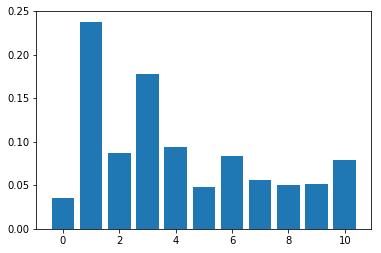

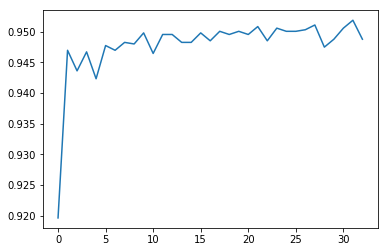

In [27]:
# X will have the numeric data, Y will have the target class
X = np.array(test_df.iloc[:, 2:13]) 
Y = np.array(test_df['label']) 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# n_estimators es el numero de arboles
classifier=RandomForestClassifier(n_estimators=5)

# Entrenar
classifier=classifier.fit(X_train, y_train)

# Predecir
predictions=classifier.predict(X_test)

# Obtener metricas de error
confusion_matrix(y_test, predictions)
accuracy_score(y_test, predictions)

# Ver la importancia de cada feature para este algoritmo
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print(model.feature_importances_)
list(model.feature_importances_)

# Graficar importancia de cada uno
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

# Ver aporte de cada arbol
trees=range(40)
accuracy=np.zeros(40)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(X_train, y_train)
    predictions=classifier.predict(X_test)
    accuracy[idx]=accuracy_score(y_test, predictions)

plt.cla()
plt.plot(trees, accuracy)

### Prediccion con 33 arboles (Cuanto mas mejor)

In [28]:
pred_df = pd.merge(features, kaggle_df, how='inner', on='person')

In [29]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19415 entries, 0 to 19414
Data columns (total 13 columns):
Unnamed: 0                                  19415 non-null int64
person                                      19415 non-null object
cantidad de conversiones                    19415 non-null float64
cantidad de veces que vio un producto       19415 non-null float64
cantidad de visitas a la pagina             19415 non-null float64
cantidad de checkouts                       19415 non-null float64
visitaron el sitio entre las 13hs y 24hs    19415 non-null float64
cantidad de vistas del J5                   19415 non-null float64
cantidad de vistas del iphone 5s            19415 non-null float64
cantidad de vistas del samsung s6 flat      19415 non-null float64
cantidad de vistas del iphone 6             19415 non-null float64
cantidad de vistas del iphone 6s            19415 non-null float64
cantidad de vistas entre semana             19415 non-null float64
dtypes: float64(11), in

In [42]:
# X will have the numeric data, Y will have the target class
X_train = np.array(test_df.iloc[:, 2:13]) 
y_train = np.array(test_df['label']) 
X_test = np.array(pred_df.iloc[:, 2:13]) 

# n_estimators es el numero de arboles
classifier=RandomForestRegressor(n_estimators=33)

# Entrenar
classifier=classifier.fit(X_train, y_train)

# Predecir
pred_df['label'] = classifier.predict(X_test)
pred_df.head(20)

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana,label
0,0,4886f805,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.016128
1,2,0297fc1e,0.0,404.0,95.0,7.0,64.0,0.0,1.0,0.0,213.0,213.0,81.0,0.151515
2,3,2d681dd8,0.0,13.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.146970
3,4,cccea85e,0.0,739.0,22.0,1.0,18.0,0.0,2.0,1.0,0.0,0.0,20.0,0.060606
4,5,4c8a8b93,0.0,177.0,20.0,2.0,13.0,0.0,21.0,0.0,83.0,83.0,10.0,0.000000
5,7,29ebb414,0.0,8.0,4.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,2.0,0.000000
6,11,3dc1950f,0.0,595.0,30.0,3.0,24.0,0.0,10.0,16.0,21.0,21.0,30.0,0.030303
7,12,8ea4c165,0.0,97.0,7.0,3.0,6.0,3.0,0.0,9.0,0.0,0.0,4.0,0.030303
8,14,d8cfe234,1.0,39.0,4.0,3.0,4.0,0.0,0.0,8.0,0.0,0.0,4.0,0.121212
9,17,d6bc64df,0.0,155.0,7.0,2.0,2.0,0.0,18.0,0.0,8.0,8.0,4.0,0.000000


### Armar el archivo de submit

In [43]:
out_df = pred_df[['person', 'label']]
out_df.set_index('person', inplace=True)
out_df.head()

,label
person,
4886f805,0.016128
0297fc1e,0.151515
2d681dd8,0.146970
cccea85e,0.060606
4c8a8b93,0.000000


In [44]:
out_df.to_csv('D:/DATOS/RELOADED/csv/submit.csv')